In [1]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [13]:
def dft(f_):
    """
    愚直に和を取る
    """
    N_ = len(f_)
    F_ = np.full(N_, 0j)
    x = -1j*2*np.pi/N_
    for k in range(N_):
        for n in range(N_):
            F_[k] += f_[n] * np.exp(x*k*n)
    return F_

def fft_poor(f_, start=0, d=1):
    """
    各kのDFTを再帰的に2分割して高速化
    - バタフライ演算非対応
    - 配列を何度も作るのでコストがかかっていそう
    """
    N_ = len(f_) / d
    if 1 < N_:
        return fft_poor(f_, start, d*2) + fft_poor(f_, start+d, d*2) * np.exp(-1j*2*np.pi*np.arange(len(f_))/N_)
    else:
        return np.array([f_[start]])

def fft(f_):
    """
    Cooley-Tukey アルゴリズム
    """
    N_ = len(f_)
    b = int(np.log2(N_))
    F_ = []
    for i in range(N_):
        F_.append(f_[reverse_bit(i, b)])
    window = 1
    while window < N_:
        window <<= 1
        j = 0
        for i in range(N_):
            if i%window < window/2:
                k = int(i + window/2)
                wi = np.exp(-1j * 2 * np.pi * (i%window) / window)
                wk = np.exp(-1j * 2 * np.pi * (k%window) / window)
                F_[i], F_[k] = F_[i] + wi * F_[k], F_[i] + wk * F_[k]
    return F_

def reverse_bit(num, b):
    """
    bビットの数値numのビットを逆順に変換
    - ex. num=2, b=4 の場合、0010 => 0100 => 4
    - ex. num=20, b=6 の場合、010100 => 001010 => 10
    """
    tmp = num
    res = tmp & 1
    for _ in range(b-1):
        tmp >>= 1
        res = (res << 1) | (tmp & 1)
    return res

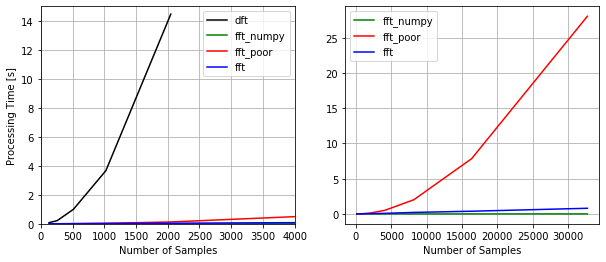

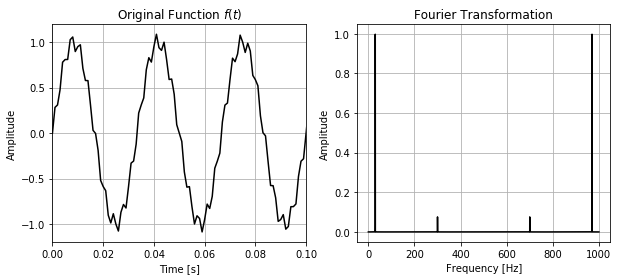

In [14]:
N_list = [2**i for i in range(7, 16)]
process_time = {'dft': [], 'fft_poor': [], 'fft': [], 'fft_numpy': []}

import time
dt = 0.001
for N_ in N_list:
    t_ = np.arange(N_) * dt
    f_ = np.sin(30 * 2*np.pi*t_) + 0.1 * np.sin(300 * 2*np.pi*t_)
    
    if N_ < 2**12:
        start = time.time()
        F_ = dft(f_)
        process_time['dft'].append(time.time() - start)
    
    start = time.time()
    F_ = fft_poor(f_)
    process_time['fft_poor'].append(time.time() - start)
    
    start = time.time()
    F_ = np.fft.fft(f_)
    process_time['fft_numpy'].append(time.time() - start)
    
    start = time.time()
    F_ = fft(f_)
    process_time['fft'].append(time.time() - start)
    #plt.plot(np.linspace(0, int(1/dt), N_), np.abs(F_) / N_ * 2)
    #plt.show()


fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
axL.grid()
axL.set_xlabel('Number of Samples')
axL.set_ylabel('Processing Time [s]')
axL.set_xlim([0, 4000])
axL.set_ylim([0, 15])
axL.plot(N_list[:5], process_time['dft'][:5], color='black', label='dft')
axL.plot(N_list, process_time['fft_numpy'], color='green', label='fft_numpy')
axL.plot(N_list, process_time['fft_poor'], color='red', label='fft_poor')
axL.plot(N_list, process_time['fft'], color='blue', label='fft')
axL.legend()
axR.grid()
axR.set_xlabel('Number of Samples')
#axR.set_ylabel('Processing Time [s]')
axR.plot(N_list, process_time['fft_numpy'], color='green', label='fft_numpy')
axR.plot(N_list, process_time['fft_poor'], color='red', label='fft_poor')
axR.plot(N_list, process_time['fft'], color='blue', label='fft')
axR.legend()
plt.show()

fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
axL.grid()
axL.set_title('Original Function $f(t)$')
axL.set_xlabel('Time [s]')
axL.set_ylabel('Amplitude')
axL.set_xlim([0, 0.1])
axL.plot(t_, f_, color='black')
axR.grid()
axR.set_title('Fourier Transformation')
axR.set_xlabel('Frequency [Hz]')
axR.set_ylabel('Amplitude')
axR.plot(np.linspace(0, int(1/dt), N_), np.abs(F_)/N_*2, color='black')
plt.show()

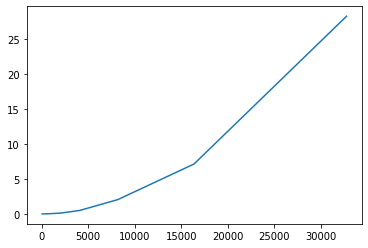

[0.0019578933715820312, 0.004541873931884766, 0.004651784896850586, 0.015439748764038086, 0.042922258377075195, 0.11861801147460938, 0.4972860813140869, 2.048892021179199, 7.147287130355835, 28.28701400756836]


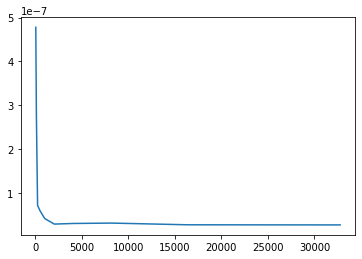

In [150]:
N_list = [2**i for i in range(6, 16)]
process_time = []

import time
dt = 0.01
for N_ in N_list:
    t_ = np.arange(N_) * dt
    f_ = np.sin(10 * 2*np.pi*t_) + 0.1 * np.sin(20 * 2*np.pi*t_)
    start = time.time()
    F_ = fft(f_)
    end = time.time()
    process_time.append(end - start)
    #plt.plot(np.linspace(0, int(1/dt), N_), np.abs(F_) / N_ * 2)
    #plt.show()

plt.plot(N_list, process_time)
plt.show()

print(process_time)
plt.plot(N_list, np.array(process_time)/np.array(N_list)/np.array(N_list))

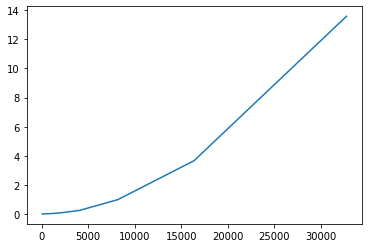

[0.0027549266815185547, 0.002286672592163086, 0.003183126449584961, 0.01297307014465332, 0.024799108505249023, 0.0761721134185791, 0.24567484855651855, 0.9838757514953613, 3.660576820373535, 13.589269161224365]


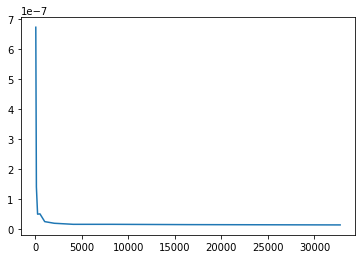

In [151]:
N_list = [2**i for i in range(6, 16)]
process_time = []

import time
dt = 0.01
for N_ in N_list:
    t_ = np.arange(N_) * dt
    f_ = np.sin(10 * 2*np.pi*t_) + 0.1 * np.sin(20 * 2*np.pi*t_)
    start = time.time()
    F_ = fft_pakuri(f_)
    end = time.time()
    process_time.append(end - start)
    #plt.plot(np.linspace(0, int(1/dt), N_), np.abs(F_) / N_ * 2)
    #plt.show()

plt.plot(N_list, process_time)
plt.show()

print(process_time)
plt.plot(N_list, np.array(process_time)/np.array(N_list)/np.array(N_list))

In [85]:
dt = 0.01
N = 1024
T = dt * N
RATE = int(1/dt)

s = time.time()

t = np.arange(N) * dt
f = np.sin(10 * 2*np.pi*t) + 0.1 * np.sin(20 * 2*np.pi*t)
f2 = np.zeros(N)
for i in range(N):
    if 3*N/8 < i < 5*N/8:
        f2[i] = 1

F = fft(f)
F_abs = np.abs(F) / N * 2  # 実質同じ波（負の周波数）を指す右側半分を足す（左右対称なので2倍）

F2 = fft(f2)
F2_abs = np.abs(F2) / N * 2

2.9087066650390625e-05
0.0012619495391845703
4.454190969467163
4.45439600944519
8.483828783035278
8.484094142913818


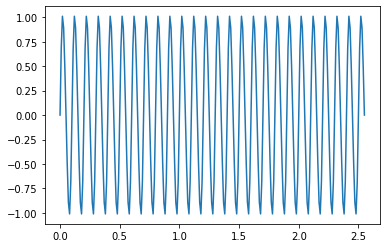

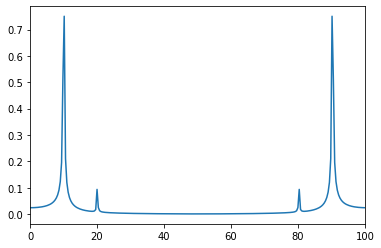

In [78]:
plt.plot(t, f)
plt.show()

fq = np.linspace(0, RATE, N)
plt.xlim([0,100])
plt.plot(fq, F_abs)
plt.show()

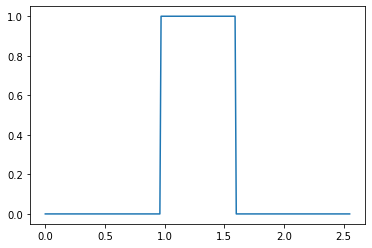

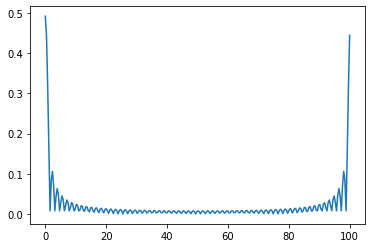

In [79]:
plt.plot(t, f2)
plt.show()

fq = np.linspace(0, RATE, N)
plt.plot(fq, F2_abs)
plt.show()